# **Different Methods to Handle Missing Values** (non-time series data)

**Table of Contents:**
1. Reasons for Missing data
2. Types of Missing data
  * MCAR
  * MAR
  * MNAR
3. Detection of Missing data
  * Numerically
  * Visually
4. Treatment for Missing data
  * Drop / Delete
    * Listwise (complete case) deletion
    * Pairwise (available case) deletion
    * Column deletion
  * Imputation
    * Simple 
      * Fill values
        * Arbitrary
        * Mean/Median/Mode
        * ffil
        * bfill
      * Interpolate
        * Linear
        * Polynomial
        * Cubic spline
    * Advanced 
      * ML methods
  * Full Analysis
5. Effect of treatment/Follow up

# Reasons for missing data

1. Figure out why the value is missing. 

  Is this value missing becuase 

   * `it dosen't exist? `
    
    it doesn't make sense to try and guess what it might be. 
    These values you probalby do want to keep as `NaN`.

   * `it wasn't recorded `
    * not collected/shared
    * deleted by mistake
   
    you can try to guess what it might have been based on the other values in that column and row. 
    This is called "imputation" 


# Types of Missing data
Rubin (1976) classified missing data problems into three categories. In his theory every data point has some likelihood of being missing.
  * The process that
governs these probabilities is called the **missing data mechanism** or response
mechanism. 
  * The model for the process is called the **missing data model** or
response model.

Rubin’s distinction is important for understanding why some methods will
not work. His theory lays down the conditions under which a missing data
method can provide valid statistical inferences. 

## 1. Missing Completely at Random (MCAR)
* the probability of being missing is the same for all cases
* causes of the missing data are unrelated to the data.
  * Missingness is independent of data
  * The missing data are just a random subset of the data.
  * The missing values on a given variable are not associated with other variables or with the variable itself. 
 * In other words, there is no particular reason for the missing values. 
* examples:
  * a weighing scale that ran out of batteries. 
  * a random sample of a population,
   * each member has the same chance of being included in the sample. 
   * The (unobserved) data of members in the population that were not included in the sample are MCAR. 
* When data are MCAR, the analysis performed on the data is unbiased; 
* MCAR is often unrealistic for the data at hand, that is, data are rarely MCAR.


## 2. Missing at Random (MAR)
  * the *probability of being missing* is the same only within groups defined
by the observed data. 
  * MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.
    * Missingness depends on the observed data
  * MAR is a much broader class than MCAR.
  * MAR is more general and more realistic than MCAR.  
  * example:
    * when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. 
      * Such data are thus not MCAR. 
      * If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR. 
    * a sample from a population, where the probability of selection depends on some known property. 

  * Modern missing data methods generally start from the MAR assumption.
    * MAR is an assumption that is impossible to verify statistically
  * MAR will provide asymptotically unbiased estimates if the parameter is estimated with Full Information Maximum Likelihood

* **Techniques to use**

>Imputation: 
  * a technique that involves replacing missing data with estimated values based on the observed data. 
  * There are several methods for imputation, such as 
    * mean imputation, 
    * hot-deck imputation, and 
    * regression imputation. 
  * Imputation can help to reduce the bias and increase the power of statistical analyses. 
  * Imputation requires assumptions about the underlying data distribution and can introduce additional variability in the results.

>Maximum Likelihood Estimation (MLE): 
  * a method that estimates the parameters of a statistical model by maximizing the likelihood of the observed data. 
  * MLE can be used to estimate the missing data and fit a model to the observed data simultaneously. 
  * MLE can provide unbiased and efficient estimates of the parameters of interest if the missing data mechanism is correctly specified.

>Weighting: 
  * a technique that involves assigning weights to observations based on the probability of being missing. 
  * Weighting can help to account for the non-randomness of the missing data and reduce the bias in the estimates. 
  * Example: Inverse Probability Weighting (IPW), which weights the observed data by the inverse of the probability of being observed.

>Model-based approaches: 
  * involve fitting models that account for missing data. 
  * Example: Expectation-Maximization (EM) algorithm, which iteratively estimates the missing data and fits a model to the observed data. 
  * Model-based approaches can be computationally intensive but can provide more accurate estimates of the parameters of interest.

* **Avoid the following techniques**

> Complete case analysis: 
  * a technique that involves excluding observations with missing data from the analysis. 
  * can lead to biased results if the missing data is related to the outcome or predictor variables. 

  >Pairwise deletion: 
  * a technique that involves using only the available data for each pair of variables in the analysis. 
  * can lead to biased results if the missing data is related to the outcome or predictor variables. 

  >Listwise deletion: 
  * a technique that involves excluding all observations that have any missing data from the analysis. 
  * can lead to a loss of statistical power and biased estimates if the missing data is related to the outcome or predictor variables. 

  >Mean imputation: 
  * a technique that involves replacing missing data with the mean of the observed data for that variable. 
  * can lead to biased estimates of the parameters of interest if the missing data is related to the outcome or predictor variables. 

## 3. Missing Not at Random (MNAR)
* the probability of being missing varies for reasons that are unknown to us.
    * Missingness depends on unobserved data or the value of the missing data itself.
    * neither MCAR nor MAR holds, 
    * also, called NMAR (not missing at random) 
* example: 
  * the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this. 
   * If the heavier objects are measured later in time, then we obtain a distribution of the measurements that will be distorted. 
   * Includes the possibility that the scale produces more missing values for the heavier objects, a situation that might be difficult to recognize and handle. 
* MNAR in public opinion research occurs if those with weaker opinions respond less often. 
* MNAR is the most complex case. 
* Strategies to handle MNAR are to 
 * find more data about the causes for the missingness, or 
 * perform what-if analyses to see how sensitive the results are under various scenarios.


In [ ]:
# dislay all outputs in a cell (https://rb.gy/lbz7hn)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Setting your working directory
!pwd
!ls
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

/content
drive  sample_data


In [ ]:
# import required packages
import numpy as np
import pandas as pd

# import dataset 
df = pd.read_csv('./data/aug_train1.csv') # ,parse_dates=['Date'] option for date columns

In [ ]:
# No of rows and columns in the dataset
df.shape 

# Looking at first 5 rows
#df.head()

(19158, 14)

In [ ]:
# Looking at a random sample of 5 rows
#df.sample(5)

In [ ]:
# Better understanding of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19130 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [ ]:
# display the variable names (column names)
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
# A quick stattistical view

df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19130.000000,19158.000000,19158.000000
mean,16875.358179,0.828840,65.366896,0.249348
std,9616.292592,0.123391,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
# Counting all the unique values the variable "gender" takes
df['gender'].value_counts()
print('\nTotal number of non missing values :', df['gender'].value_counts().sum())

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


Total number of non missing values : 14650


In [ ]:
df['city_development_index'].value_counts()

0.920    5195
0.624    2700
0.910    1528
0.926    1335
0.698     679
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

##General guidelines to correctly specify the **missing data mechanism**

>*Understand the missing data mechanism:* To correctly specify the missing data mechanism, you need to have a good understanding of the data and the reasons why data are missing. This understanding can come from domain knowledge, data collection procedures, and data quality assessments.

>Evaluate the patterns of missingness: Look for patterns in the missingness of the data. Are there any subgroups of the population that are more likely to have missing data? Are there any variables that are associated with the missingness of the data?

>Use statistical methods: There are several statistical methods that can help you identify the missing data mechanism. For example, you can use graphical methods such as the missingness plot or the pattern of missingness by variable plot. You can also use statistical tests such as the Little's MCAR test or the likelihood ratio test for MAR.

>Consider sensitivity analysis: It's important to assess the robustness of your analysis to different missing data mechanisms. You can do this by performing sensitivity analysis using different missing data assumptions and comparing the results.

>Report the missing data mechanism: Once you have identified the missing data mechanism, report it clearly in your analysis. This will help others to understand your analysis and to assess the validity of your inferences.


# 3. Detecting the Missing values 
1. Numerically using 
  * `describe()`
  * `isnull()`
2. Graphically using `missingno` package

## 3.1.1 Using `describe()` function to get all non-missing values

The count property directly gives the count of `non-NaN values` in each column.

In [ ]:
df.describe(include='all').loc['count']

enrollee_id               19158.0
city                        19158
city_development_index    19130.0
gender                      14650
relevent_experience         19158
enrolled_university         18772
education_level             18698
major_discipline            16345
experience                  19093
company_size                13220
company_type                13018
last_new_job                18735
training_hours            19158.0
target                    19158.0
Name: count, dtype: object

In [ ]:
#counting values only for numeric columns 
#df.numeric.describe() #not working
df.describe(include=[np.number]).loc['count']

enrollee_id               19158.0
city_development_index    19130.0
training_hours            19158.0
target                    19158.0
Name: count, dtype: float64

In [ ]:
# Including non-numerical columns 
df.describe(exclude=[np.number]).loc['count']

city                   19158
gender                 14650
relevent_experience    19158
enrolled_university    18772
education_level        18698
major_discipline       16345
experience             19093
company_size           13220
company_type           13018
last_new_job           18735
Name: count, dtype: object

## 3.1.2. Using `isnull()` function to get all missing values

`notnull` may be alternatively used to get all non-missing values

In [ ]:
# counting the missing values under each column

df_mis=df.isnull().sum()
df_mis


enrollee_id                  0
city                         0
city_development_index      28
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
df.isnull().mean()*100
df_mis_pcent=100*df.isnull().sum()/len(df)
print('\n\nMissing percentage:\n\n', df_mis_pcent)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.146153
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64



Missing percentage:

 enrollee_id                0.000000
city                       0.000000
city_development_index     0.146153
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64


In [ ]:
# Make a table of missing values with %
df_mis_table=pd.concat([df_mis,df_mis_pcent],axis=1)
df_mis_table

,0,1
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,28,0.146153
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


In [ ]:
# Rename the columns 
df_mis_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

,Missing Values,% of Total Values
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,28,0.146153
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


In [ ]:
# checking the null values under a specific row

df.loc[10, :].isnull().sum()

5

In [ ]:
# checking all null values in the dataset

df.isnull().sum().sum()

20761

In [ ]:
## percent of data that is missing
df.isnull().sum().sum()/np.product(df.shape)*100

7.7405186941673

## 3.2. Using Missingno library

Missingno library is helpful for graphical analysis of missing values. 

<Axes: >

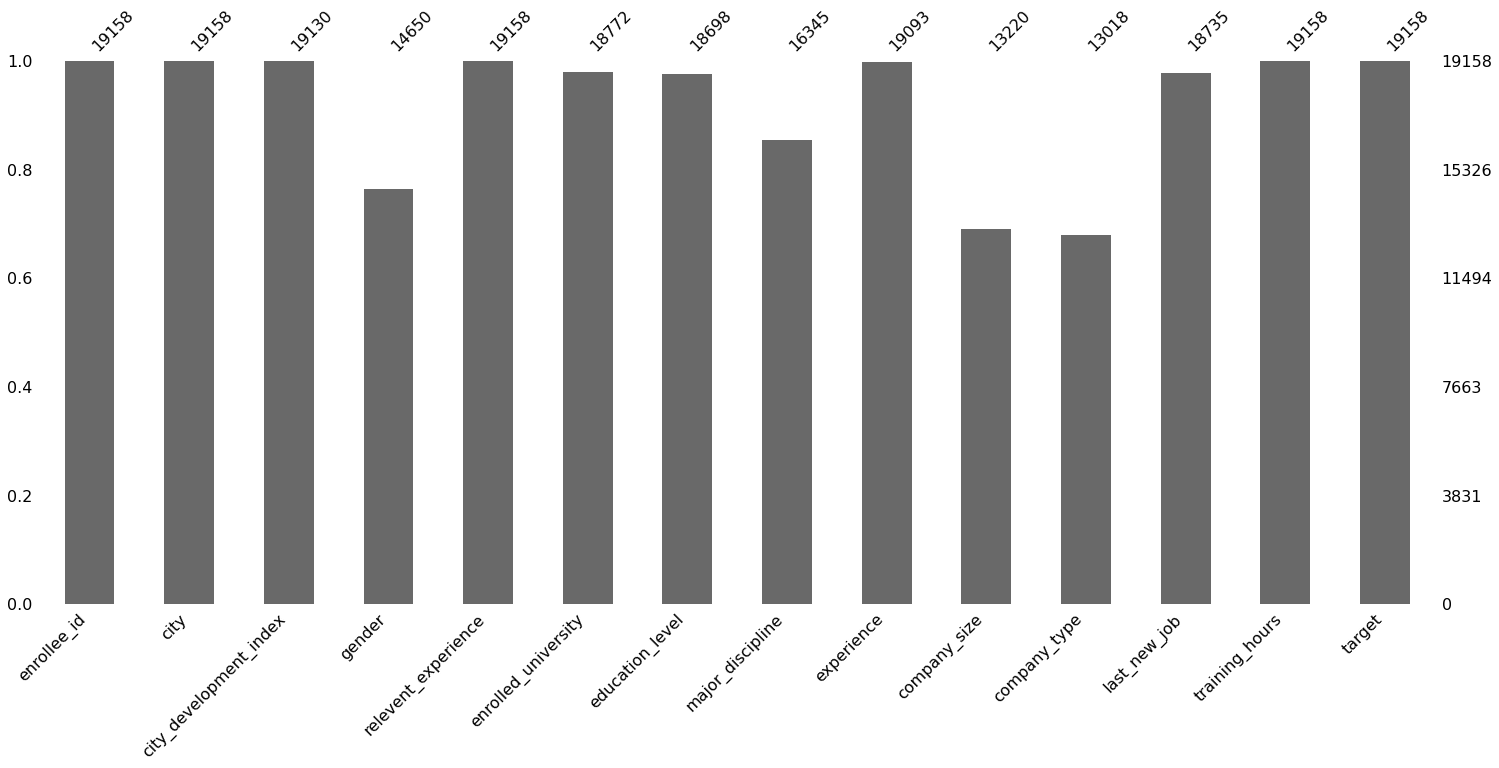

In [ ]:
import missingno as msno
msno.bar(df)

#### Visualizing the locations of the missing data

1. The plot appears white wherever there are missing values. 

2. The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

<Axes: >

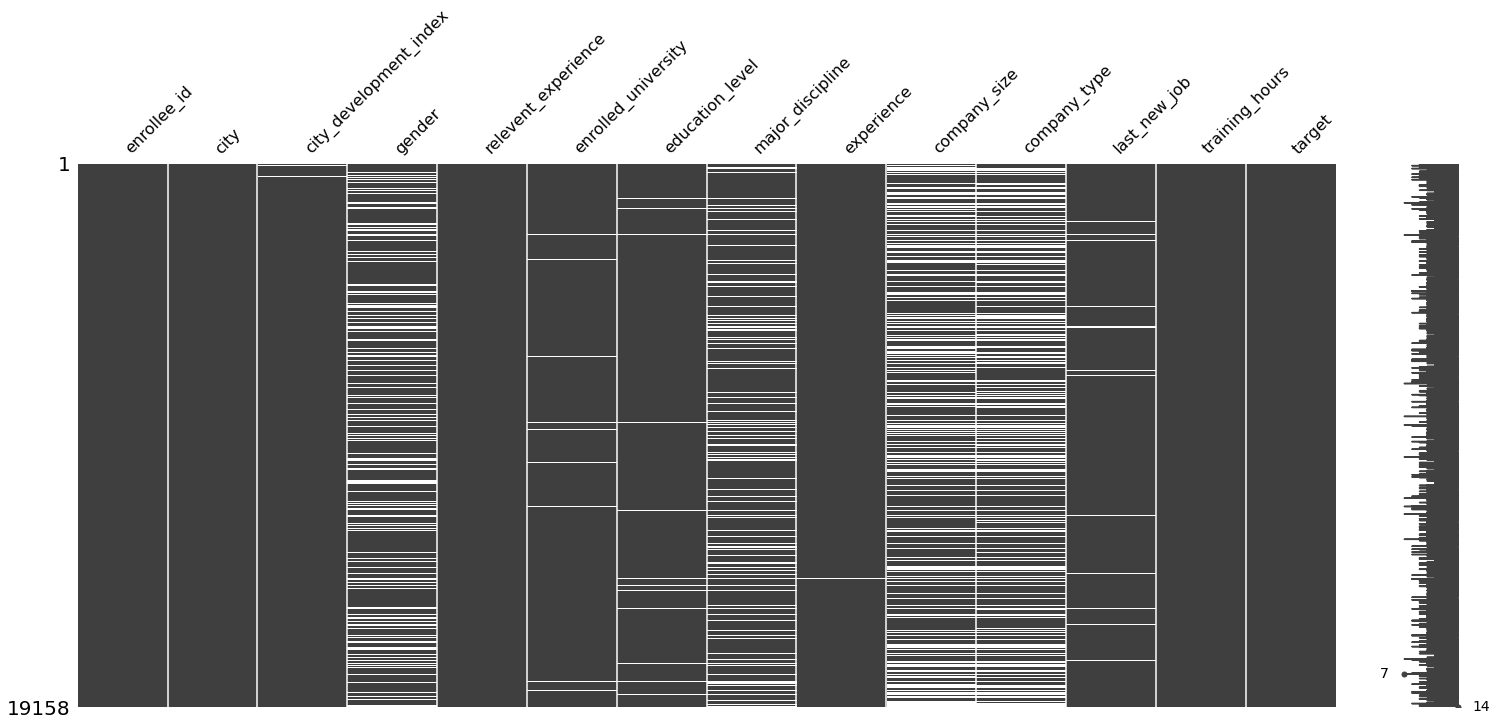

In [ ]:

msno.matrix(df)

<Axes: >

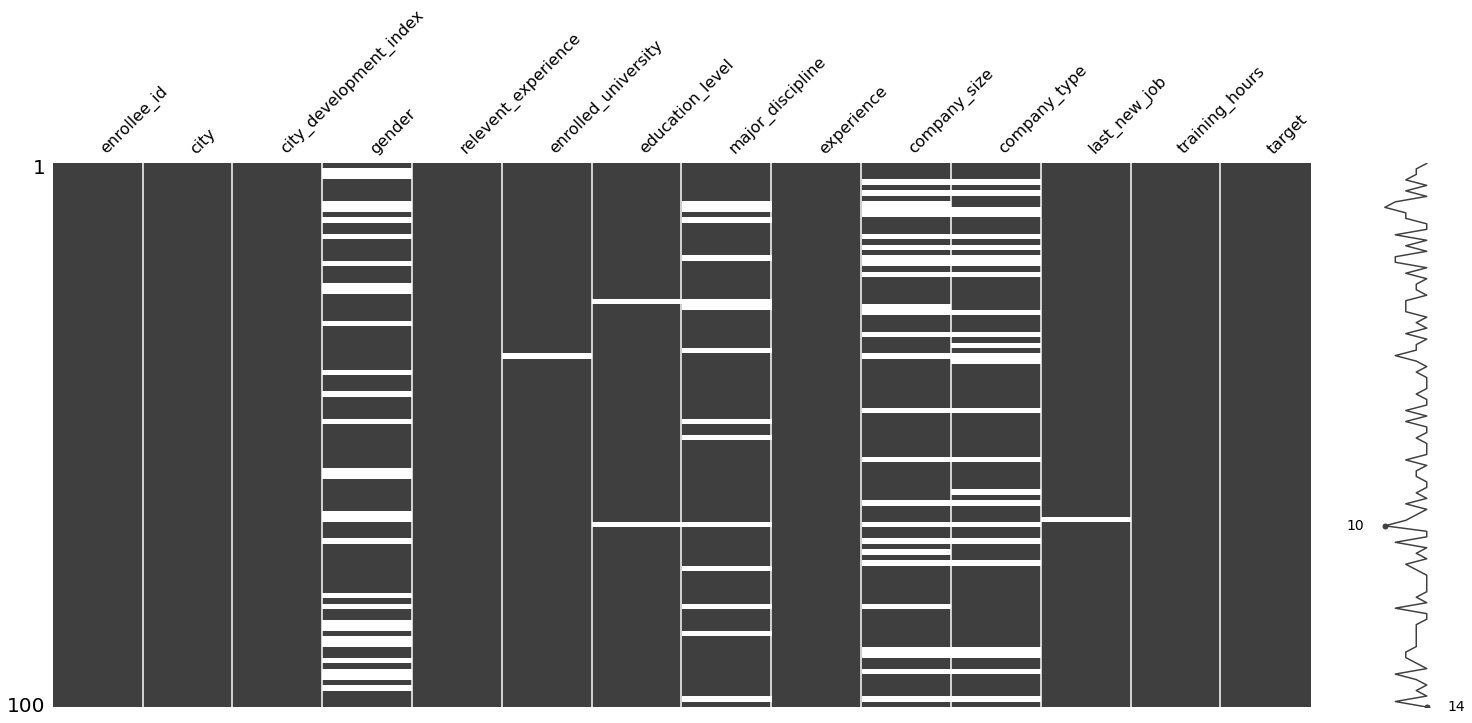

In [ ]:
msno.matrix(df.sample(100))

<Axes: >

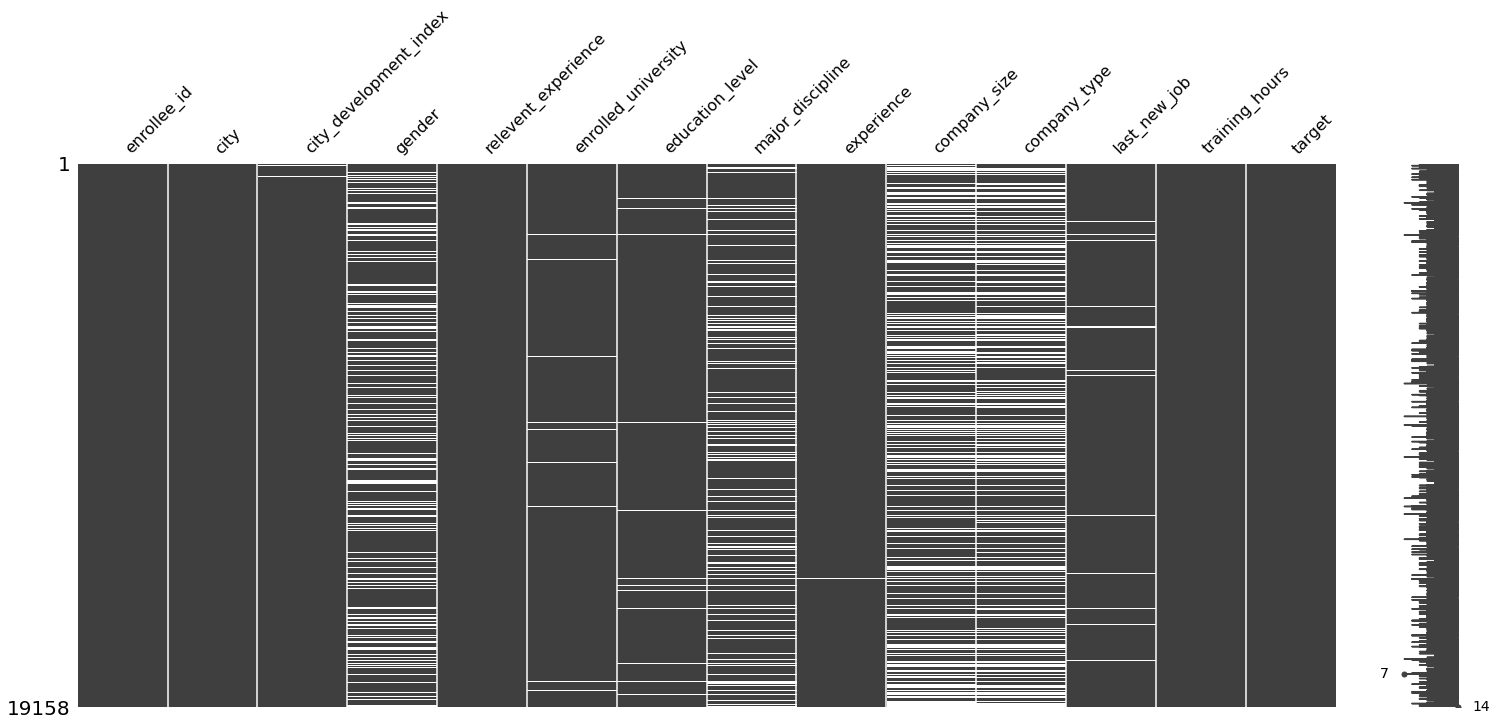

In [ ]:
# Finding reason for missing data using matrix plot
msno.matrix(df)

<Axes: >

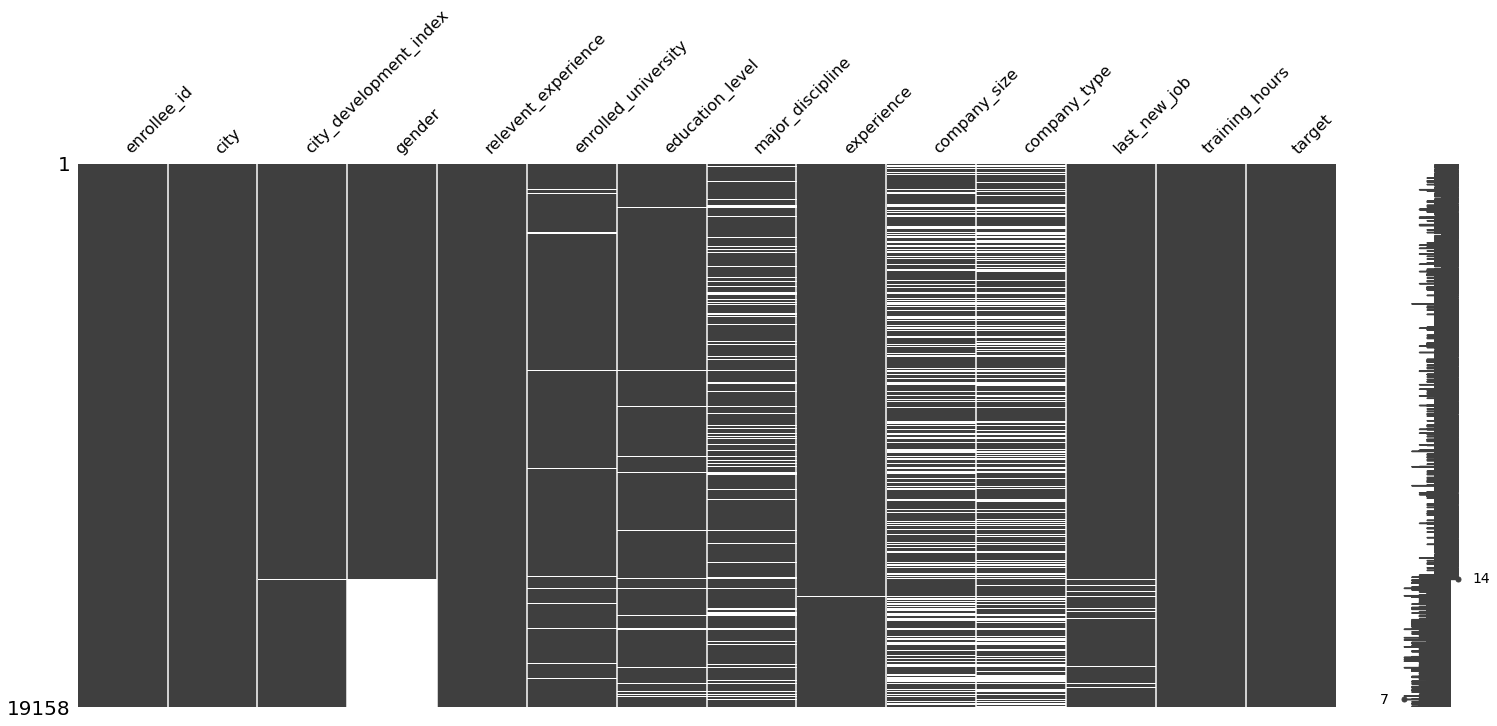

In [ ]:
#sorted by Gender
sorted = df.sort_values('gender')
msno.matrix(sorted)

it is clear that there is no relation between the missingness in `Gender` and rest variables.

<Axes: >

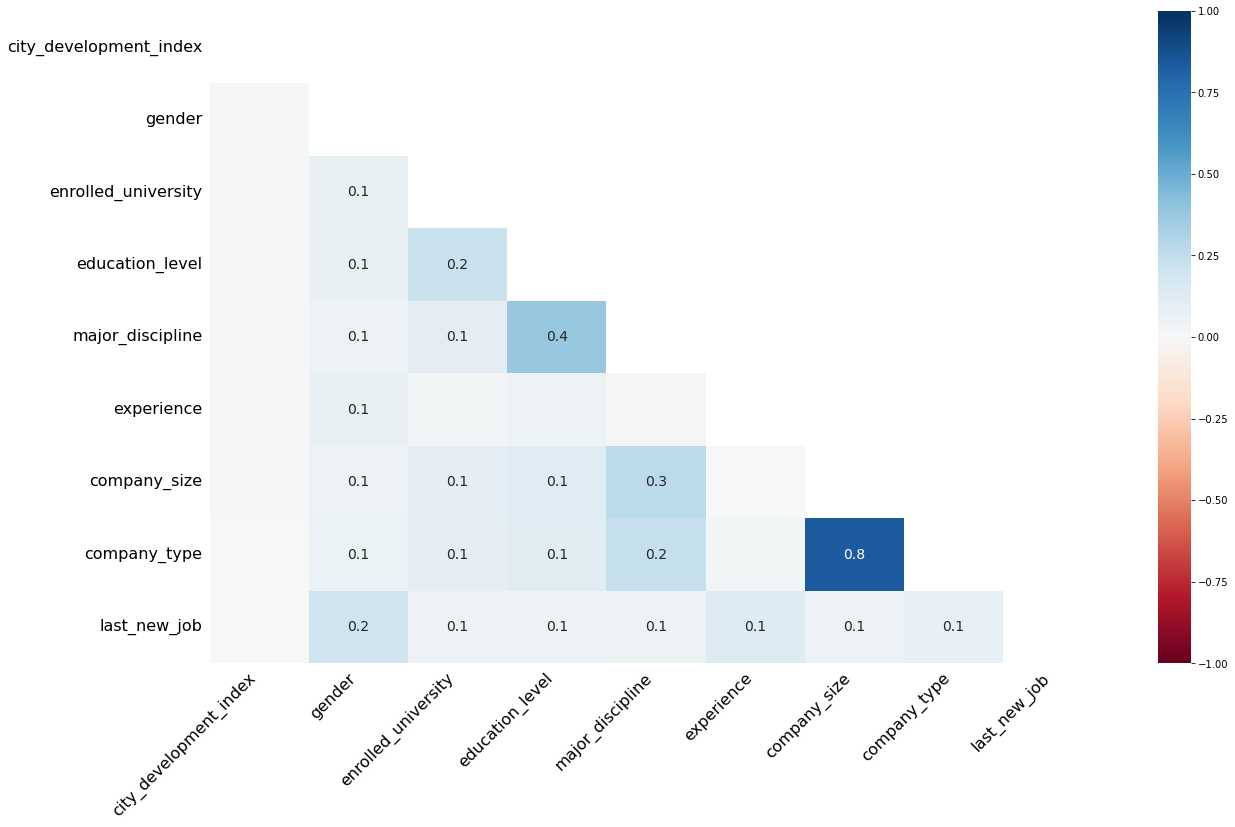

In [ ]:
## Finding reason for missing data using a Heatmap
msno.heatmap(df)

The heatmap function shows that there are no strong correlations between missing values of different variables. 

Low correlations further indicate that the data are MAR.

<Axes: >

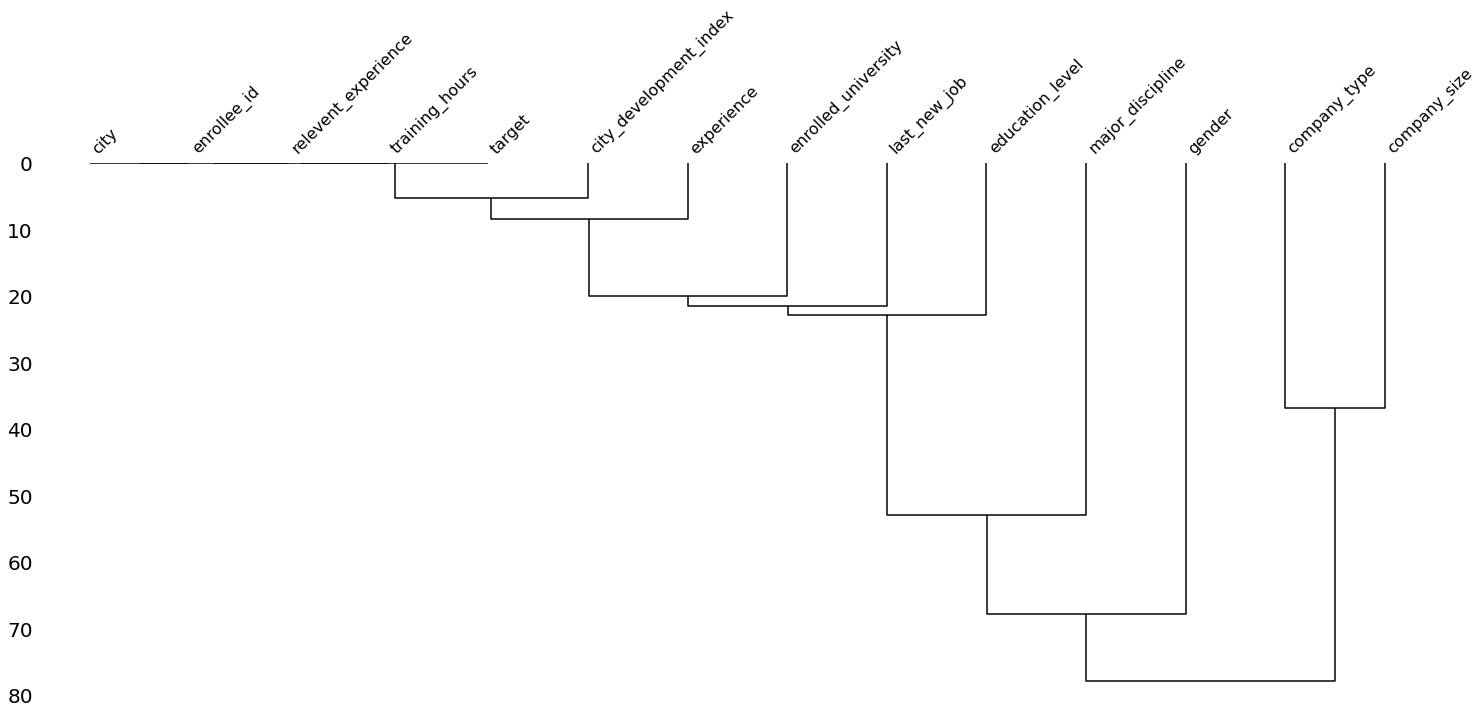

In [ ]:
## Finding reason for missing data using Dendrogram
# A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.
msno.dendrogram(df)

# 4. Treatment of missing data

* Missing data reduces the representativeness of the sample and can therefore distort inferences about the population. 
* There are three main approaches to handle missing data: 
  * (1) Drop/delete—where samples with invalid data are discarded from further analysis
  * (2) Imputation—where values are filled in the place of missing data,
  * (3) Analysis—by directly applying methods unaffected by the missing values. 

# 4.1. Drop/Delete Missing Values

* If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. 
* this approch is not reccomended for important projects
* It's usually worth it to take the time 
    to go through your dataset
    look at all the columns with missing values one-by-one 

The first choice is to remove the `missing values` using `.drop` method of Pandas.

## (4.1.1) List-wise deletion
* Complete case analysis (listwise deletion) is the default way of handling
incomplete data in many statistical packages
* eliminates all cases with one or more missing values on the analysis variables.
* If the data are MCAR, listwise deletion produces 
  * unbiased estimates of means, variances and regression weights. 
  * standard errors and significance levels that are correct for the reduced subset of data, but that are often larger relative to all available data.
* If the data are not MCAR, listwise deletion can severely bias estimates of
means, regression coefficients and correlations. 
  * the bias in the estimated mean increases with the 
    * difference between means of the observed and missing cases, and 
    * proportion of the missing data.  
  * bias of listwise deletion under MAR and MNAR is simulated by [Schafer and Graham](https://pubmed.ncbi.nlm.nih.gov/12090408/).
* major advantage of complete case analysis is convenience. 
* can provide better estimates than even the most sophisticated procedures. 
* Very useful often in the context of regression analysis
* A disadvantage of listwise deletion is that it is potentially wasteful. 
  * It is not uncommon in real life applications that more than half of the original sample is lost, especially if the number of variables is large.
  * a smaller subsample could seriously degrade the ability to
detect the effects of interest.
  * can lead to nonsensical subsamples.
  * can introduce inconsistencies in reporting.

In [ ]:
df.isna().sum()


enrollee_id                  0
city                         0
city_development_index      28
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
df['city_development_index'].mean()

0.8288400418191323

## (4.1.2) Pairwise deletion (available-case analysis) 
* attempts to remedy the data loss problem of listwise deletion. 
* Pairwise deletion is used when values are missing completely at random i.e MCAR. 
* During Pairwise deletion, only the missing values are deleted. 
* All operations in pandas like mean,sum etc intrinsically skip missing values.
* The method calculates the 
  * means and (co)variances on all observed data. 
  * the mean of variable X is based on all cases with observed data on X, 
  * the mean of variable Y uses all cases with observed Y-values, and so on.
  * For the correlation and covariance, all data are taken on which both X and Y have non-missing scores. 
  * Subsequently, the matrix of summary statistics are fed into a program for regression analysis, factor analysis or other modeling procedures.
* The method is simple, uses all available information and produces
consistent estimates of mean, correlations and covariances under MCAR
* The estimates can be biased if the data are not MCAR. 
* Some columns having no missing values are also affected by this.
* A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. 
* use it only when the number of missing values is very small.

In [ ]:
df.dropna(subset=['gender'],how='any',inplace=True)
df['gender'].isnull().sum()

df.isna().sum()

0

enrollee_id                  0
city                         0
city_development_index      18
gender                       0
relevent_experience          0
enrolled_university        213
education_level            259
major_discipline          1978
experience                  16
company_size              4313
company_type              4433
last_new_job                74
training_hours               0
target                       0
dtype: int64

## (4.1.3) drop columns with at least one missing value

* Columns that contain a lot of missing values, say more than 80%, and the feature is not significant, you can delete that feature. 
* However, it is not a good methodology to remove a variable by deleting data.

In [ ]:
df.dropna(axis=1)

,enrollee_id,city,gender,relevent_experience,training_hours,target
0,8949,city_103,Male,Has relevent experience,36,1
1,29725,city_40,Male,No relevent experience,47,0
4,666,city_162,Male,Has relevent experience,8,0
6,28806,city_160,Male,Has relevent experience,24,0
7,402,city_46,Male,Has relevent experience,18,1
...,...,...,...,...,...,...
19152,29754,city_103,Female,Has relevent experience,25,0
19153,7386,city_173,Male,No relevent experience,42,1
19154,31398,city_103,Male,Has relevent experience,52,1
19155,24576,city_103,Male,Has relevent experience,44,0


# **4.2. Imputation/Filling Missing Values**

* Specify what we want the `NaN` values to be replaced with. 
* Check your variable type before filling
  * Categorical case- replace all the `NaN` values with appropriate value of the labels/factors
  * Numerical Case- replace all the `NaN` values with appropriate values like 0, mean, and others.
* There are two types 
  * Univariate : Using one variable (the same) for imputing the mising values
  * Multivariate : Using multiple variables for imputing the mising values in one variable
* This may be done by two ways...
  * Using basic python/`pandas` tools
    * Use `fillna()` function to fill in missing values
  * Using special packages like `sklearn`
    * Use `SimpleImputer()` function to fill in missing values

In [ ]:
# get the index or location of the missing values 
idx=df.index[df.gender.isna()].to_list()

## (4.2.1) Fill missing values with specific guess (arbitrary) values

* Applicable for numerical and categorical variables
* Useful when 
  * missing data are **MNAR** type
* Advantage: Simple
* Disadvantages:
  * Changes the shape of the distribution
  * Changes variability in the data
  * Creates outliers 
  * Changes in covariance/ Correlation



In [ ]:
df.gender.loc[idx[:101]]='Male'
df.gender.loc[idx[:101]]

<ipython-input-33-eb11bb01a041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender.loc[idx[:101]]='Male'


Series([], Name: gender, dtype: object)

## (4.2.2) Fill missing values with the mean/median/mode value(s)
* Mean/Median values applicable for numerical data
* Mode value applicable for categorical data
* Useful when 
  * missing data are **MCAR** type
  * percentage of missing data is less than 5%.
* Advantage: Simple
* Disadvantages:
  * Changes the shape of the distribution
  * Changes variability in the data
  * Creates outliers 
  * Changes in covariance/ Correlation

In [ ]:
fill_mean = df.city_development_index.fillna(df['city_development_index'].mean())
fill_mean

0        0.920
1        0.776
4        0.767
6        0.920
7        0.762
         ...  
19152    0.920
19153    0.878
19154    0.920
19155    0.920
19156    0.802
Name: city_development_index, Length: 14650, dtype: float64

## (4.2.3) Fill missing values with the mean/median/mode value within groups
* fill missing values in the group by the Mean/Median values for the same group
* Useful when 
  * missing data are **MCAR** type
  * percentage of missing data is less than 5%.
* Advantage: Simple
* Disadvantages:
  * Changes the shape of the distribution
  * Changes variability in the data
  * Creates outliers 
  * Changes in covariance/ Correlation

## (4.2.4) End of distribution imputation

* Applicable for numerical variables
* Useful when 
  * missing data are **MNAR** type
* If distribution of missing values is 
  * Normal : fill missing values by `μ+3σ`
  * Skewed : fill missing values by `Q1-1.5 IQR` or `Q3+1.5 IQR`
* Advantage: Easy to apply
* Disadvantages:
  * Changes the shape of the distribution
  * Changes variability in the data
  * Creates outliers 
  * Changes in covariance/ Correlation

## (4.2.5) Hot deck method

Fill each missing value with an existing value from a similar case within the dataset

#(4.2.6) `fillna()` methods

1.  `fillna()` is used for imputing missing values
   * `ffill`- Replace `NaN`s with **last observed value**
   * `bfill`- Replace `NaN`s with **next observed value**


In [ ]:
df_ts = pd.read_csv('./data/city_day_aqi.csv',parse_dates=True,index_col='Date')
df_ts1=df_ts.copy(deep=True)
df_ts.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
#Missing Values
df_ts_mis= pd.concat([df_ts.isnull().sum(), 100 * df_ts.isnull().sum() / len(df_ts)], axis=1)
df_ts_mis.rename(columns = {0 : 'Missing', 1 : '% of Total'})

,Missing,% of Total
City,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692
O3,4022,13.619586


### (4.2.6.1) Impute missing values with `ffill`

Replace all `NA's` with the value that comes directly after it (*last observed value*) in the same column, then replace all the reamining `NA's` with 0 for numerical data.



In [ ]:
# Imputing Xylene value
df_ts['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

In [ ]:
df_ts.fillna(method='ffill',inplace=True)
df_ts['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

### (4.2.6.2) Impute missing values with `bfill`

Replace all `NA's` with the value that comes directly before it in the same column, then replace all the reamining `NA's` with 0 for numerical data.

In [ ]:
# Imputing PM10 value
df_ts['PM10'][1580:1600]

Date
2019-04-30       NaN
2019-05-01       NaN
2019-05-02       NaN
2019-05-03       NaN
2019-05-04       NaN
2019-05-05       NaN
2019-05-06       NaN
2019-05-07       NaN
2019-05-08       NaN
2019-05-09       NaN
2019-05-10       NaN
2019-05-11       NaN
2019-05-12       NaN
2019-05-13       NaN
2019-05-14    141.54
2019-05-15    122.41
2019-05-16    116.32
2019-05-17    130.07
2019-05-18    138.31
2019-05-19    111.73
Name: PM10, dtype: float64

In [ ]:
df_ts.fillna(method='bfill',inplace=True)
df_ts['PM10'][1580:1600]

Date
2019-04-30    141.54
2019-05-01    141.54
2019-05-02    141.54
2019-05-03    141.54
2019-05-04    141.54
2019-05-05    141.54
2019-05-06    141.54
2019-05-07    141.54
2019-05-08    141.54
2019-05-09    141.54
2019-05-10    141.54
2019-05-11    141.54
2019-05-12    141.54
2019-05-13    141.54
2019-05-14    141.54
2019-05-15    122.41
2019-05-16    116.32
2019-05-17    130.07
2019-05-18    138.31
2019-05-19    111.73
Name: PM10, dtype: float64

# (4.3) Imputation using Interpolation

* imputing using `backward fill` and `forward fill` isn't the best solution to address the missing value problem. 
* A better alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.
* `interpolate()` interpolation methods
  * `method="linear"` 
    * fill missing values with an increasing order between the previous and next observed values. (treats values as *equally spaced* by ignoring the index)
  * `method=polynomial, spline, nearest, quadratic`

## (4.3.1) Linear interpolation
* assumes a linear relationship between data points 
* utilises non-missing values from adjacent data points to compute missing values
* It is the default method

In [ ]:
df_ts1['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

In [ ]:
df_ts1.interpolate(limit_direction="both",inplace=True)
#df_ts1['Xylene'].interpolate(method="linear") #interpolating a specific column
df_ts1['Xylene'][50:70]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
2015-03-07     0.3900
2015-03-08     0.6300
2015-03-09     1.3500
2015-03-10     1.7400
2015-03-11     2.7800
Name: Xylene, dtype: float64

## (4.3.2) Polynomial method

In [ ]:
df_ts2=df_ts.copy(deep=True)
df_ts2['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

In [ ]:
df_ts2['Xylene'].interpolate(method='polynomial',order=2)
df_ts2['Xylene'][50:70]

Date
2015-01-01    0.00
2015-01-02    3.77
2015-01-03    2.25
2015-01-04    1.00
2015-01-05    2.78
              ... 
2020-06-27    0.73
2020-06-28    0.38
2020-06-29    0.00
2020-06-30    0.00
2020-07-01    0.00
Name: Xylene, Length: 29531, dtype: float64

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

## (4.2.3) cubic spline method

In [ ]:
df_ts1['Xylene'].interpolate(method='cubicspline',order=2)

Date
2015-01-01    0.00
2015-01-02    3.77
2015-01-03    2.25
2015-01-04    1.00
2015-01-05    2.78
              ... 
2020-06-27    0.73
2020-06-28    0.38
2020-06-29    0.00
2020-06-30    0.00
2020-07-01    0.00
Name: Xylene, Length: 29531, dtype: float64

# 4.4. Imputation using ML methods
We used pandas function for imputation (univariate). Now, we will use the `scikit-learn` package as an alternate method for the same imputation.
1. `SimpleImputer` function from `scikit-learn` useful to
  * replace missing values with a fill value. 
  * `strategy` parameter options gives 4 different imputation methods
    * `strategy='mean'` replaces missing values using the mean of the column.
    * `strategy='median'` replaces missing values using the median of the column.
    * `strategy='most_frequent'` replaces missing values using mode of the column (If multi modal, use the minimum mode.)
    * `strategy='constant'` replaces missing values using a defined fill value.

  * The default behavior fills in the `mean value` for imputation.
2. K-Nearest Neighbour **(KNN)** Imputation
  
  * An alternative way to impute missing values is to predict them. 
  * This is a multivariate imputation method.
  * use `KNNImputer` from `Scikit-learn`
    * missing values are imputed using the mean value from K-nearest neighbors found in the training set.
  * is a distance-based algorithm
  * KNNImputer has several parameters such as 
    * `missing_values` - default `np.nan`, 
    * `n_neighbors` - number of neighboring samples used for imputation, default 5, 
    * `metric`- distance metric for searching neighbors, default `nan-euclidean` 
  * can work with continuous, discrete and categorical data types but not with text data. 
3. Multivariate Imputation by Chained Equation (**MICE**)
  * MICE algorithm starts with a random draw from the observed data, and imputes the incomplete data in a variable-by-variable fashion. 
  * One iteration consists of one cycle
through all Yj . 
  * generates multiple imputations by executing Algorithm 4.3 in parallel $m$ times.
  
  * MICE algorithm is a Markov chain Monte Carlo (MCMC) method,
where the state space is the collection of all imputed values. 
  * one of the most used imputation techniques
  * MICE algorithm functions as
    * first calculates the mean of every column where there is a missing value and uses the mean value as a placeholder. 
    * runs a series of regression models (chained equations) to impute each missing value sequentially. 
    * uses a feature matrix and target variable (column with missing values) to train
    * predicts and updates missing values on target columns. 
    * this process repeats by constantly changing the placeholder variables with the predictions from the previous iteration until it reaches a robust estimation.

  * use `IterativeImputer` from `scikit-learn` to apply MICE algorithm

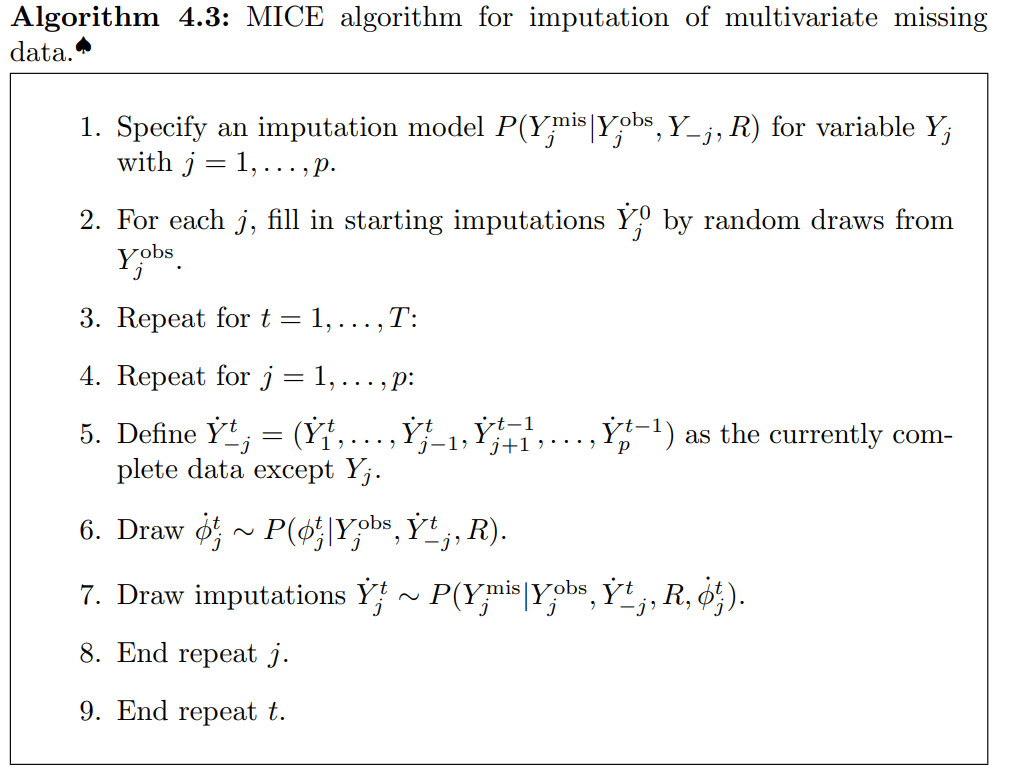

In [ ]:
# imputing with a constant using special functions from `SKLEARN`

from sklearn.impute import SimpleImputer
df_constant = df.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using a constant value
df_constant.iloc[:,:] = mean_imputer.fit_transform(df_constant)
df_constant.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
df_constant

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,missing_value,missing_value,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
6,28806,city_160,0.92,Male,Has relevent experience,no_enrollment,High School,missing_value,5,50-99,Funded Startup,1,24,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,29754,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,missing_value,missing_value,1,42,1
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,missing_value,missing_value,4,52,1
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0


In [ ]:
## Impute missing values using sklearn package
df_frequent = df.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df_frequent.iloc[:,:] = mean_imputer.fit_transform(df_frequent)

df_frequent.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# 4.5. Full Analysis

These methods take full account of all information available, without the distortion resulting from using imputed values as if they were actually observed:
 1. Generative approaches:
  * The expectation-maximization algorithm
  * full information maximum likelihood estimation
 2. Discriminative approaches:
  * Max-margin classification of data with absent features
  * Partial identification methods 

3. Algorithms which handle missing values on its own
  * [`XGBoost`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) 
  * [`LightGBM`](https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html) 

#**5. Follow up techniques**
The imputation methods discussed above 
  * Changes the shape of the distribution
  * Changes variability in the data
  * Creates outliers 
  * Changes in covariance/ Correlation

Check the difference with all these four cases by comparing it before imputation and after imputation.

If the difference is minimal, then imputation works fine. 

> EVALUATE IMPUTATION METHODS
1. Mean Absolute Error (MAE) $\qquad \frac{1}{N}\sum\limits_{i=1}^N |y_i-\hat{y}|$
2. Root Mean Squared Error (RMSE) $\qquad \sqrt{\frac{1}{N}\sum\limits_{i=1}^N (y_i-\hat{y})^2 }$
3. Pearson’s Correlation Coefficient (R2) $\qquad 1-\frac{\sum\limits_{i=1}^N (y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^N (y_i-\bar{y})^2}$
4. Rank Product

where $\hat{y}$ is predicted value of $y$ and $\bar{y}$ is mean value of $y$




# REFERENCES

1. [Flexible Imputation of Missing Data](https://stefvanbuuren.name/fimd/)
2. [Introduction to Regression Methods for Public Health Using R](https://bookdown.org/rwnahhas/RMPH/)